In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot') # Look Pretty


def plotDecisionBoundary(model, X, y):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    padding = 0.6
    resolution = 0.0025
    colors = ['royalblue','forestgreen','ghostwhite']

    # Calculate the boundaris
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    x_range = x_max - x_min
    y_range = y_max - y_min
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding

    # Create a 2D Grid Matrix. The values stored in the matrix
    # are the predictions of the class at at said location
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                       np.arange(y_min, y_max, resolution))

    # What class does the classifier say?
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour map
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.terrain)

    # Plot the test original points as well...
    for label in range(len(np.unique(y))):
        indices = np.where(y == label)
    plt.scatter(X[indices, 0], X[indices, 1], c=colors[label], label=str(label), alpha=0.8)

    p = model.get_params()
    plt.axis('tight')
    plt.title('K = ' + str(p['n_neighbors']))

/home/faris/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Load up the dataset into a variable called X. Check the .head and compare it to the file you loaded in a text editor. Make sure you're loading your data properly--don't fail on the 1st step!

In [9]:
X = pd.read_csv('./Datasets/wheat.data', index_col=0)
print(X.columns)
print(X.head(4))

Index([u'area', u'perimeter', u'compactness', u'length', u'width',
       u'asymmetry', u'groove', u'wheat_type'],
      dtype='object')
     area  perimeter  compactness  length  width  asymmetry  groove wheat_type
id                                                                            
0   15.26      14.84       0.8710   5.763  3.312      2.221   5.220       kama
1   14.88      14.57       0.8811   5.554  3.333      1.018   4.956       kama
2   14.29      14.09       0.9050   5.291  3.337      2.699   4.825       kama
3   13.84      13.94       0.8955   5.324  3.379      2.259   4.805       kama


 Copy the 'wheat_type' series slice out of X, and into a series called 'y'. Then drop the original 'wheat_type' column from the X

In [10]:
y = X.wheat_type
X = X.drop(['wheat_type'], axis=1)

In [11]:
print(y)
print(X.columns)

id
0          kama
1          kama
2          kama
3          kama
4          kama
5          kama
6          kama
7      canadian
8          kama
9          kama
10         kama
11         kama
12         kama
13         kama
14         kama
15         kama
16         kama
17         kama
18         kama
19         kama
20         kama
21         kama
22         kama
23         kama
24         kama
25         kama
26         kama
27         kama
28         kama
29         kama
         ...   
180    canadian
181    canadian
182    canadian
183    canadian
184    canadian
185    canadian
186    canadian
187    canadian
188    canadian
189    canadian
190    canadian
191    canadian
192    canadian
193    canadian
194    canadian
195    canadian
196    canadian
197    canadian
198    canadian
199    canadian
200    canadian
201    canadian
202    canadian
203    canadian
204    canadian
205    canadian
206    canadian
207    canadian
208    canadian
209    canadian
Name: wheat_type, dty

Do a quick, "ordinal" conversion of 'y'. In actuality our classification isn't ordinal, but just as an experiment...

In [20]:
oy = y.astype("category", categories=y.unique(), ordered=True)  # ordered category y

Basic nan munging. Fill each row's nans with the mean of the feature

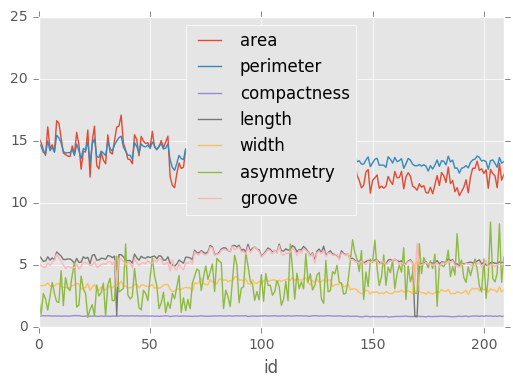

In [26]:
X.head()
X = X.fillna(X.mean())
X.plot()

Split X into training and testing data sets using `train_test_split()`.

INFO: Use 0.33 test size, and use random_state=1. This is important
so that your answers are verifiable. In the real world, you wouldn't
specify a random_state.

In [27]:
from sklearn.model_selection import train_test_split
splitting = train_test_split(X, test_size=0.33, random_state=1)

Create an instance of SKLearn's Normalizer class and then train it using its .fit() method against your *training* data.

 NOTE: The reason you only fit against your training data is because in a
 real-world situation, you'll only have your training data to train with!
 In this lab setting, you have both train+test data; but in the wild,
 you'll only have your training data, and then unlabeled data you want to
 apply your models to.

In [34]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
normfit = norm.fit(*splitting)

With your trained pre-processor, transform both your training AND
 testing data.

 NOTE: Any testing data has to be transformed with your preprocessor
 that has been fit against your training data, so that it exist in the same
 feature-space as the original data used to train your models.

In [37]:
transformfit = normfit.transform(X, y)

Just like your preprocessing transformation, create a PCA
 transformation as well. Fit it against your training data, and then
 project your training and testing features into PCA space using the
 PCA model's .transform() method.

 NOTE: This has to be done because the only way to visualize the decision
 boundary in 2D would be if your KNN algo ran in 2D as well:

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(transformfit)
T = pca.transform(transformfit)

 Create and train a KNeighborsClassifier. Start with K=9 neighbors.
 NOTE: Be sure train your classifier against the pre-processed, PCA-
 transformed training data above! You do not, of course, need to transform
 your labels.

In [46]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=9)
knn = model.fit(T[0], T[1])

/home/faris/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 2]

TypeError: unhashable type

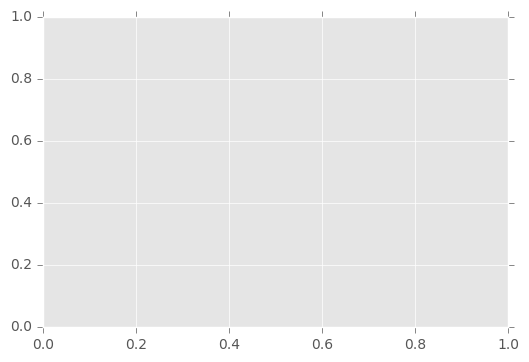

In [45]:
# HINT: Ensure your KNeighbors classifier object from earlier is called 'knn'
#plotDecisionBoundary(knn, X_train, y_train)
plotDecisionBoundary(knn, X, y)

Display the accuracy score of your test data/labels, computed by
 your KNeighbors model.

 NOTE: You do NOT have to run .predict before calling .score, since
 .score will take care of running your predictions for you automatically.

BONUS: Instead of the ordinal conversion, try and get this assignment
 working with a proper Pandas get_dummies for feature encoding. 
 
 HINT:
 You might have to update some of the plotDecisionBoundary code.

In [ ]:
plt.show()